In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from Ska.engarchive import fetch as fetch
from Ska.Matplotlib import plot_cxctime
from kadi import events
import tables
from Chandra.Time import DateTime

In [2]:
# From Replan Central
def calc_hrc_shield(dat):
    # HRC proxy model based on fitting the 2SHLDART data
    # with a combination of GOES-16 channels at the time
    # of the Sep 2017 flare
    hrc_shield = (143 * dat['p5'] + 64738 * dat['p6']
                  + 162505 * dat['p7'] + 4127) / 256.
    return hrc_shield


def get_arc_goes_data():
    # Retrieve GOES data archived through Replan Central (arc)
    h5_file = "/proj/sot/ska/data/arc3/hrc_shield.h5"
    out = {}

    with tables.open_file(h5_file, mode='r',
                          filters=tables.Filters(complevel=5, complib='zlib')) as h5:
        table = h5.root.data

    h5 = tables.open_file(h5_file, mode='r')
    table = h5.root.data
    
    out['sat'] = table.col('satellite')
    out['secs'] = table.col('time')
    out['p1'] = table.col('p1')
    out['p2a'] = table.col('p2a')
    out['p2b'] = table.col('p2b')
    out['p3'] = table.col('p3')
    out['p4'] = table.col('p4')
    out['p5'] = table.col('p5')
    out['p6'] = table.col('p6')
    out['p7'] = table.col('p7')
    out['p8a'] = table.col('p8a')
    out['p8b'] = table.col('p8b')
    out['p8c'] = table.col('p8c')
    out['p9'] = table.col('p9')
    out['hrc_shield'] = table.col('hrc_shield') # scaled by 256
    h5.close()
    
    return out


def plot_data_model(start, stop, ls='None', pad=True):
    """
    """
    ok = (arc_goes['hrc_shield'] > 0.1) & \
         (arc_goes['secs'] > DateTime(start).secs) & \
         (arc_goes['secs'] < DateTime(stop).secs)
    
    # Fetch shield telemetry
    shld = fetch.Msid('2shldbrt', start=start, stop=stop)
    
    if pad:
        interval_pad = 30 # secs
        events.rad_zones.interval_pad = (interval_pad, interval_pad)
        shld.remove_intervals(events.rad_zones)
        
    plt.figure(figsize=(15, 10))
    plot_cxctime(arc_goes['secs'][ok], hrc_shield[ok], 'k',
                 label='HRC shield model (GOES proxy)')
    plot_cxctime(shld.times, shld.vals // 256, ls=ls,
                 marker='.', color='steelblue', alpha=0.5,
                 label='Telemetry, 2SHLDBRT / 256')
    plt.grid()
    plt.xlabel('Time')
    plt.ylabel('HRC Shield')
    plt.legend();   

In [3]:
# Realtime GOES data archived through Replan Central 
# NOTE: Replan Central contains hrc_shield proxy that is normalized (/ 256)
arc_goes = get_arc_goes_data()
hrc_shield = calc_hrc_shield(arc_goes)

In [4]:
start = '2021:001:12:00:00.000'
stop = '2021:200:12:00:00.000'

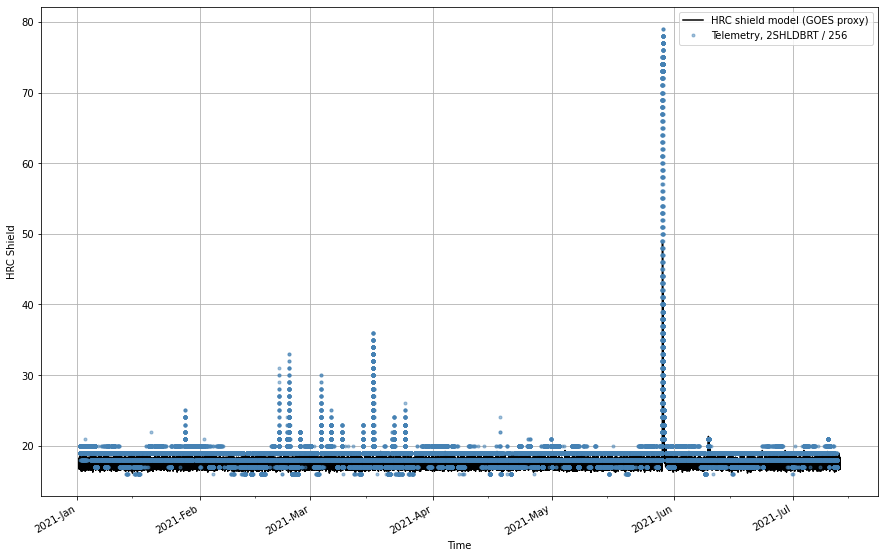

In [5]:
plot_data_model(start, stop, ls='None', pad=True)

In [6]:
# 149:2021 = 29 May 2021
start = '2021:148:12:00:00.000'
stop = '2021:150:12:00:00.000'

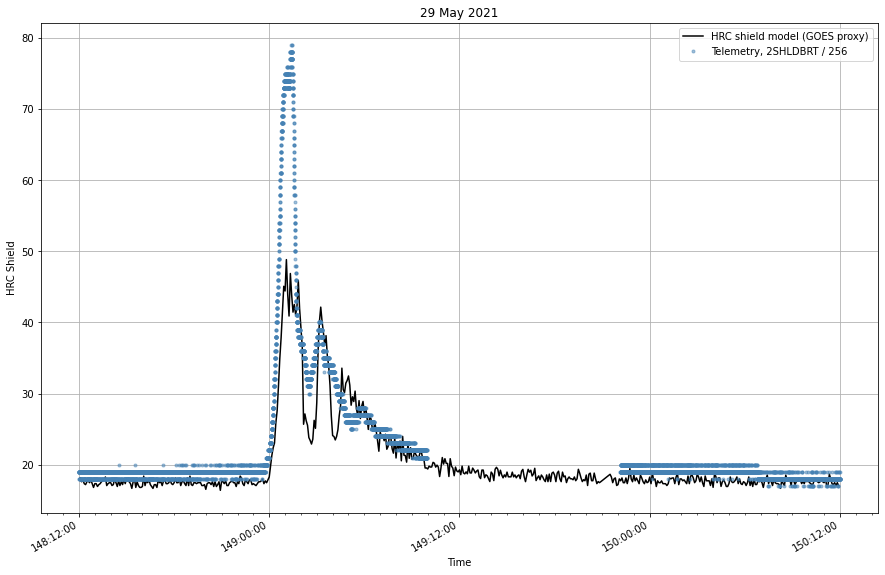

In [7]:
plot_data_model(start, stop, ls='None', pad=True)
plt.title('29 May 2021');

In [8]:
# 149:2021 = 29 May 2021
start = '2021:148:12:00:00.000'
stop = '2021:162:12:00:00.000'

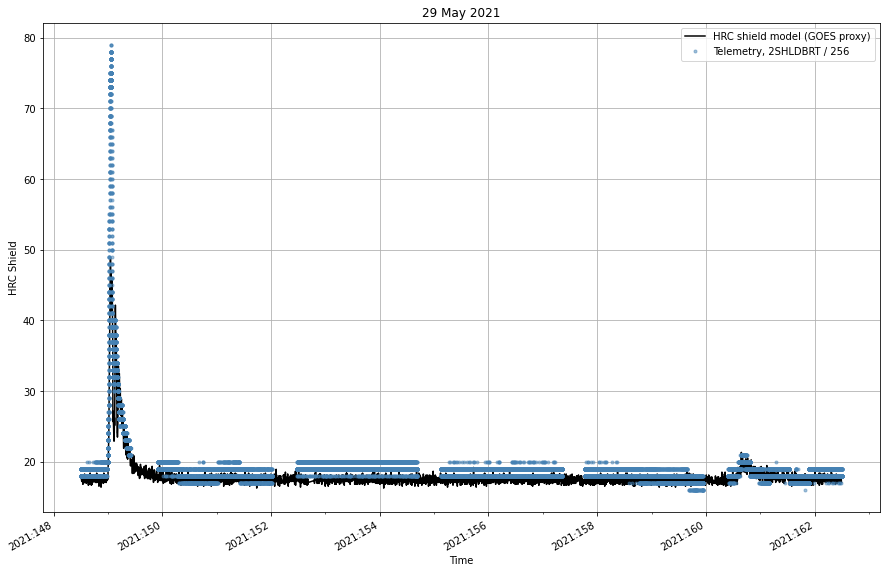

In [9]:
plot_data_model(start, stop, ls='None', pad=True)
plt.title('29 May 2021');

In [10]:
start = '2021:048:12:00:00.000'
stop = '2021:088:12:00:00.000'

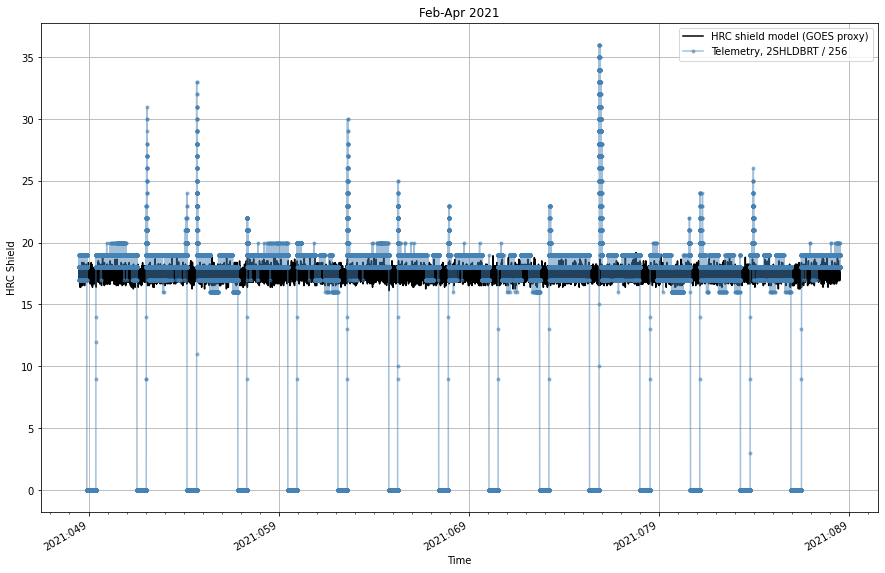

In [11]:
plot_data_model(start, stop, ls='solid', pad=False)
plt.title('Feb-Apr 2021');

In [12]:
start = '2021:053:12:00:00.000'
stop = '2021:056:12:00:00.000'

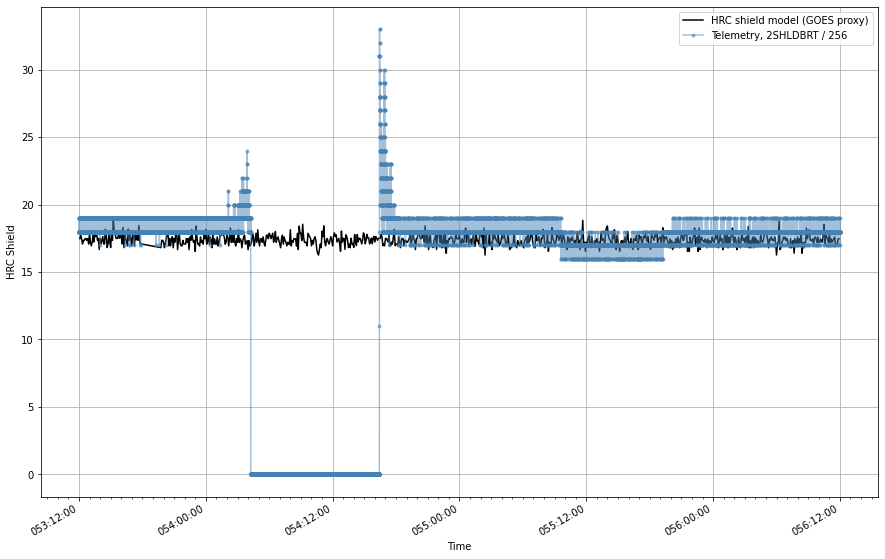

In [13]:
plot_data_model(start, stop, ls='solid', pad=False)

In [14]:
start = '2021:075:12:00:00.000'
stop = '2021:077:12:00:00.000'

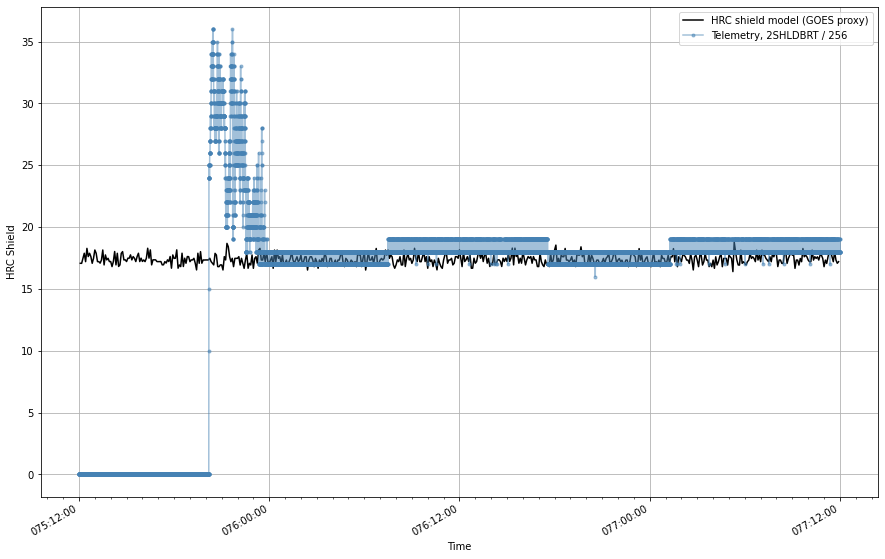

In [15]:
plot_data_model(start, stop, ls='solid', pad=False)

In [16]:
start = '2021:083:12:00:00.000'
stop = '2021:085:12:00:00.000'

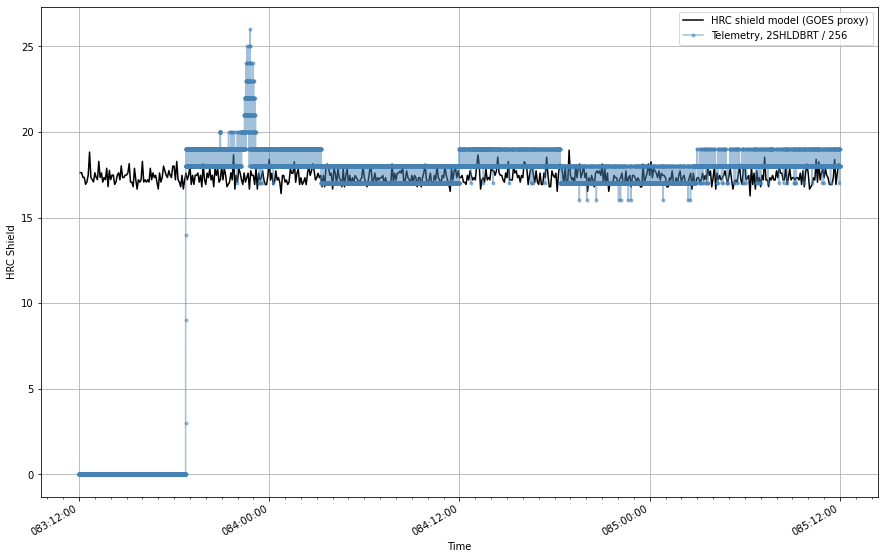

In [17]:
plot_data_model(start, stop, ls='solid', pad=False)